Exercise 1:
Part (a):

Firstly, I multiplied out Matrix A to get:
A = (1/b)[[b,1],[-1,1]]
A = [[1,1/b],[-1/b,1/b]]
I can now plot this into a numpy matrix as shown below:

In [198]:
import numpy as np
a = 4
b = 3
A = np.matrix([[1,1/b],[-1/b,1/b]])

Now I will import all the parts 1-4 as a list of coordinates as a list of arrays.
I did this in such a way that I could read if the points were connected, by looking at the space next to the coordinate for a given symbol
c = → = connected
n = then = not connected

In [199]:
Part1 = [[a,a],"c",[a,-a],"c",[-a,-a],"c",[-a,a],"c",[a,a]]
Part2 = [[1-a,a-1],"c",[-a/4,a-1],"c",[-a/4,a/2],"c",[1-a,a/2],"c",[1-a,a-1]]
Part3 = [[a/4,a-1],"c",[a-1,a/2],"n",[a-1,a-1],"c",[a/4,a/2]]
Part4 = [[a-1,-a/4],"c",[a-1,-a/2],"c",[1-a,-a/2],"c",[1-a,-a/4]]

Next is the function that performs the transformation of points in Parts 1-4 induced by matrix A
I do this by using the logic that:
[e,
 f,]

transformed by

[a, b,    
 c, d,]

is equal to

[a*e+b*f,
 c*e+d*f]

The function takes in two variables, coordinate, which is the coordinate point you want to apply the transformation on, and the matrix you wish to apply.
In the function, I create a new coordinates matrix of dimensions 2x1, I set the first collumn first row to a*e+b*f = matrix[0,0] * coordinate[0] + matrix[0,1] * coordinate[1]
and the first collumn second row to c*e+d*f = matrix[1,0] * coordinate[0] + matrix[1,1] * coordinate[1]
I then return the new coordinates matrix

In [200]:
def transformCoordinate(coordinate, matrix):
    newCoordinates = np.zeros((2,1))
    newCoordinates[0] = matrix[0,0]*coordinate[0]+matrix[0,1]*coordinate[1]
    newCoordinates[1] = matrix[1,0]*coordinate[0]+matrix[1,1]*coordinate[1]
    return newCoordinates

Exercise 1:
Part (b):

Using my function, I pass in every coordinate in parts 1-4 and generate the new coordinate list:

In [201]:
def newValues(part):
    x = 0
    newCoordinatesArray = []
    while x < len(part):
        newCoordinatesArray.append([transformCoordinate(part[x],A)[0],transformCoordinate(part[x],A)[1]])
        try:
            newCoordinatesArray.append(part[x+1])
        except:
            pass
        x+=2
    return newCoordinatesArray

newPart1 = newValues(Part1)
newPart2 = newValues(Part2)
newPart3 = newValues(Part3)
newPart4 = newValues(Part4)

I do this by going through every element in the part, appending to a new array the transform of the element then in the next slot append the letter associated with what we do with it, I then increment by 2 so that we ignore the letters after they have been appended to the new array.
I use a try-except to ignore the final appending of part[x+1] as this does not exist.

Next, I will plot the new parts onto a graph:

In [202]:
import matplotlib.pyplot as plt

def plotPart(part, colour):
    x = 0
    while x < len(part):
        if type(part[x][0]) == int or type(part[x][0]) == float:
            try:
                if part[x+1] == "c":
                    plt.plot([part[x][0],part[x+2][0]], [part[x][1],part[x+2][1]], colour, linestyle="-")
                else:
                    plt.plot(part[x][0], part[x][1], colour)
            except:
                pass
        else:
            try:
                if part[x+1] == "c":
                    plt.plot([part[x][0][0],part[x+2][0][0]], [part[x][1][0],part[x+2][1][0]], colour, linestyle="-")
                else:
                    plt.plot(part[x][0][0], part[x][1][0], colour)
            except:
                pass
        x+=2

This is done by looping through every second value of the part given in the function, I then check if the value in the position I wish to plot is an int of float, telling me whether or not this is a new or old part (as new parts are formatted slightly differently (with an extra dimension) so I will need to read that dimension to plot it). Following from this, I determine if the value in the position after the value I am looking at is a 'c' meaning connected, if so I will plot it with the next point and connect the two points with a line, otherwise I will just plot the point. I finally increment x (the position I am looking at) by 2 to skip the value holding either a 'c' or 'n'.

Below is the graph of the diagram before the transformation:

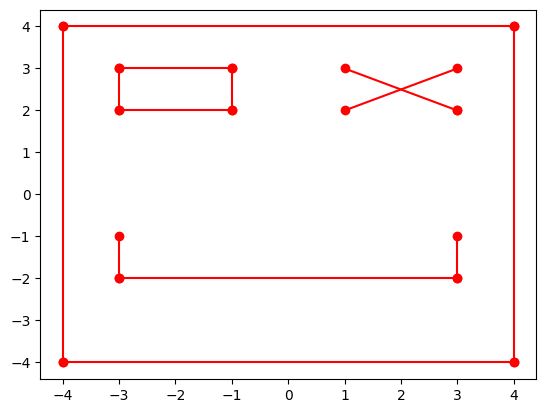

In [203]:
plotPart(Part1, 'ro')
plotPart(Part2, 'ro')
plotPart(Part3, 'ro')
plotPart(Part4, 'ro')

plt.show()

I accomplished this by simple using my function for each of the parts 1-4 and then showing the figure.


Below is the graph and the graph of the diagram before the transformation:

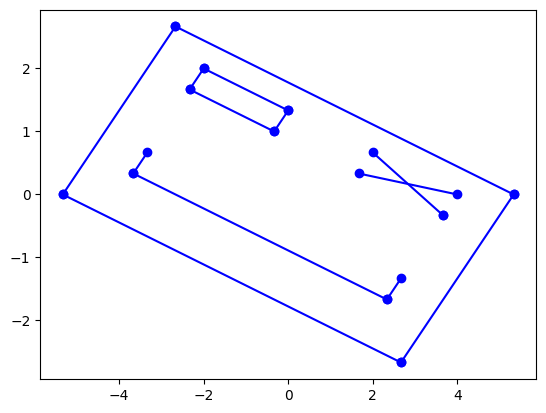

In [204]:
plotPart(newPart1, 'bo')
plotPart(newPart2, 'bo')
plotPart(newPart3, 'bo')
plotPart(newPart4, 'bo')

plt.show()

I once again used my same function but for the new parts 1-4 which I calculated prior.
From this I can see that...